In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
village = pd.DataFrame({'Person':['Person_{}'.format(i) for i in range(1,11)], 
                        'Income_Village_1':[10]*10, 
                        'Income_Village_2':[5,5,5,10,10,10,10,15,15,15],
                        'Income_Village_3':[1,1,1,1,1,1,1,10,33,50]})
village['Cum_population'] =  np.cumsum(np.ones(10)/10)
village['Cum_Income_Village_1'] =  np.cumsum(village['Income_Village_1']/100)
village['Cum_Income_Village_2'] =  np.cumsum(village['Income_Village_2']/100)
village['Cum_Income_Village_3'] =  np.cumsum(village['Income_Village_3']/100)
village = village.iloc[:, [3,4,0,5,1,6,2,7]]
village

,Income_Village_3,Cum_population,Person,Cum_Income_Village_1,Income_Village_1,Cum_Income_Village_2,Income_Village_2,Cum_Income_Village_3
0,1,0.1,Person_1,0.1,10,0.05,5,0.01
1,1,0.2,Person_2,0.2,10,0.10,5,0.02
2,1,0.3,Person_3,0.3,10,0.15,5,0.03
3,1,0.4,Person_4,0.4,10,0.25,10,0.04
4,1,0.5,Person_5,0.5,10,0.35,10,0.05
5,1,0.6,Person_6,0.6,10,0.45,10,0.06
6,1,0.7,Person_7,0.7,10,0.55,10,0.07
7,10,0.8,Person_8,0.8,10,0.70,15,0.17
8,33,0.9,Person_9,0.9,10,0.85,15,0.50
9,50,1.0,Person_10,1.0,10,1.00,15,1.00


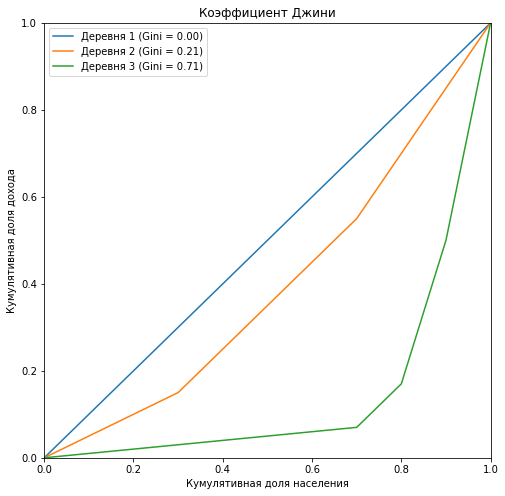

In [4]:
plt.figure(figsize = (8,8))
Gini=[]
for i in range(1,4):
    X_k = village['Cum_population'].values
    X_k_1 = village['Cum_population'].shift().fillna(0).values
    Y_k = village['Cum_Income_Village_{}'.format(i)].values
    Y_k_1 = village['Cum_Income_Village_{}'.format(i)].shift().fillna(0).values
    Gini.append(1 - np.sum((X_k - X_k_1) * (Y_k + Y_k_1)))
    plt.plot(np.insert(X_k,0,0), np.insert(village['Cum_Income_Village_{}'.format(i)].values,0,0),
             label='Деревня {} (Gini = {:0.2f})'.format(i, Gini[i-1]))

plt.legend(loc="upper left")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()
